# Week 5
In this notebook I will try to produce the timeseries with the higher order terms and also try to infer them! In a simular fashion like the week3 notebook. 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# First imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from importlib import reload
import sys # for reloading
import time
# import self made models
from W5_glv_minimal_code import * # generates Timeseries
from W5_gradient_descent import *# gradient descent algorithm
from W5_Functions import * # contains all important functions that were defined in week 2

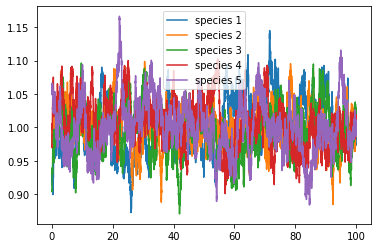

In [3]:
# Old time series generated from gLV data. Now simulate timeseries from higher order terms. 
Timeseries=main(seed=1,noise=0.05,sigma=0.05)

### New time series

In [7]:
import SecOrderTimeseries

It took 1 attempts to find a stable state


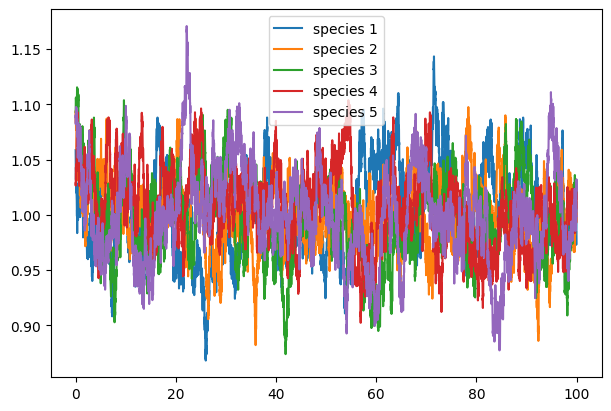

In [10]:
Timeseries = SecOrderTimeseries.main(seed=1, noise=0.05, s1=0.05, s2=0.05, selfint=None, g_m=1, g_s=0.01, pertubation=0.1, period_pertu = 101)

We see that te sime series is almost identical to before, but the is because the in as we saw before the noise dominates in this setting. This again probabily happens here. So next it would be interesting to look at the system without noise. 

Let's first evaluate the some of the elements

In [6]:
print("Interaction matrix:")
print(Timeseries['Interaction_Matrix'])
print("Second order matrix:")
print(Timeseries['SecondOrder_matrix'])
print("Growth rate:")
print(Timeseries['growthrate'])
print("Allee factor:")
print(Timeseries['allee_factor'])

Interaction matrix:
[[-1.         -0.03058782 -0.02640859 -0.05364843  0.04327038]
 [-0.11507693 -1.         -0.03806035  0.01595195 -0.01246852]
 [ 0.0731054  -0.10300704 -1.         -0.01920272  0.05668847]
 [-0.05499456 -0.00862141 -0.04389292 -1.          0.02914076]
 [-0.05503096  0.05723619  0.04507954  0.02512472 -1.        ]]
Second order matrix:
[[ 0.         -0.00614451 -0.04678847 -0.0133944   0.02651777]
 [-0.03458304  0.         -0.03435864 -0.04226028 -0.03356231]
 [-0.00063323 -0.05586552  0.          0.08299011  0.03710221]
 [-0.00959178 -0.04438145 -0.03735791  0.          0.00254039]
 [-0.03184978  0.00954577  0.10501276  0.00600795  0.        ]]
Growth rate:
[[1.0030017 ]
 [0.9964775 ]
 [0.98857482]
 [0.99650657]
 [0.99791106]]
Allee factor:
[[1.2068848 ]
 [1.3947716 ]
 [1.02997804]
 [1.26750945]
 [0.93908316]]


It is because off the Growth rate and the self interaction are so large, that the second order effects are not that prominant. 
If we let the second order interaction be on the same scale als the growth and interaction rate. One gets more prominant effects of the second order.

Another way to get the more prominat effects of the higher order is the further away you go from the equilibirum. 

So lets play a bit around with the time series in absecense of noise

It took 1 attempts to find a stable state


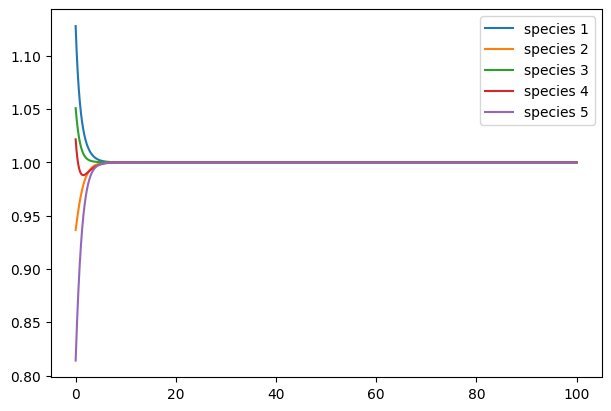

Interaction matrix:
[[-1.000e+00 -2.800e-03 -1.068e-01  8.200e-02 -8.970e-02]
 [-4.210e-02 -1.000e+00 -6.230e-02 -5.290e-02 -4.550e-02]
 [ 2.760e-02  1.146e-01 -1.000e+00 -5.590e-02  2.700e-02]
 [-2.980e-02 -1.000e-03  5.880e-02 -1.000e+00  5.000e-04]
 [-4.390e-02 -7.800e-03  1.280e-02 -4.940e-02 -1.000e+00]]
Second order matrix:
[[ 0.     -0.0319 -0.0594 -0.0711 -0.0077]
 [-0.0135  0.     -0.1217  0.0056  0.0185]
 [ 0.068   0.0251  0.      0.      0.0271]
 [-0.0157  0.0386 -0.0934  0.      0.0734]
 [-0.0168  0.0306  0.0024 -0.0415  0.    ]]
Growth rate:
[[1.01000366]
 [0.99618907]
 [0.99624331]
 [0.99925529]
 [1.00433496]]
Allee factor:
[[1.38628991]
 [1.41411499]
 [0.86694467]
 [1.06878317]
 [1.21318097]]


In [12]:
Timeseries = SecOrderTimeseries.main(seed=2, noise=0, s1=0.05, s2=0.05, selfint=None, g_m=1, g_s=0.01, pertubation=0.1, period_pertu = 101)
print("Interaction matrix:")
print(np.round(Timeseries['Interaction_Matrix'],4))
print("Second order matrix:")
print(np.round(Timeseries['SecondOrder_matrix'],4))
print("Growth rate:")
print(Timeseries['growthrate'])
print("Allee factor:")
print(Timeseries['allee_factor'])

Here in this result we see that the First order terms is way to large. Aka the growth rate and the self interaction, is to large. compared to the second order terms. 

We do see second order effects like with species 4, it shoulds past the equilibrium, this would not be possible if without the higher order terms. 

But lets play a bit arround with the selfint and growth rate.

### Keystone start

In [13]:
Timeseries = SecOrderTimeseries.main(seed=6, noise=0, s1=0.05, s2=0.05, selfint="Keystone", g_m =1, g_s = 0.1, pertubation=0.1, period_pertu = 101)
print("Interaction matrix:")
print(np.round(Timeseries['Interaction_Matrix'],4))
print("Second order matrix:")
print(np.round(Timeseries['SecondOrder_matrix'],4))
print("Growth rate:")
print(Timeseries['growthrate'])
print("Allee factor:")
print(Timeseries['allee_factor'])

SyntaxError: invalid syntax (<ipython-input-13-64db1a59b316>, line 1)

Playing arround with different seeds we see the following: 

If the self interaction happend to be low, then the convergence is also low. But we still do not really see secondary effects.

Lets just play around with diffent stuff, and I will comment on the interesting ones. 

### Playing around:

It took 13 attempts to find a stable state


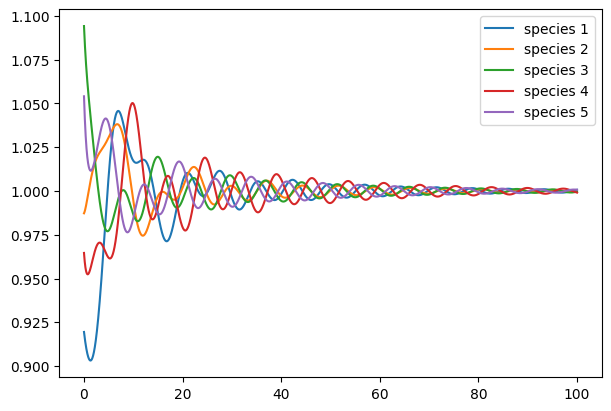

Interaction matrix:
[[-1.1636  0.8075  0.3122 -0.1933 -2.0768]
 [ 0.9475 -1.416   0.018  -1.2705  0.283 ]
 [ 0.108   0.0294 -1.7704  1.0492  0.9662]
 [ 0.7259  3.3211 -0.6002 -1.1474 -1.0148]
 [ 0.436  -0.6875 -2.6984 -1.2133 -1.8536]]
Second order matrix:
[[ 0.0000e+00  3.1400e-02 -1.8683e+00 -8.0000e-04  2.0602e+00]
 [-5.0470e-01  0.0000e+00 -1.8420e-01 -7.6190e-01 -5.6770e-01]
 [ 5.4680e-01 -7.6540e-01  0.0000e+00 -1.6418e+00 -1.3991e+00]
 [-5.5730e-01  2.0700e-01  3.1590e-01  0.0000e+00 -1.6647e+00]
 [-9.0540e-01  1.5800e-01  1.8500e-02  5.1210e-01  0.0000e+00]]
Growth rate:
[[0.197663  ]
 [0.16137024]
 [0.22638199]
 [0.19089938]
 [0.35293911]]
Allee factor:
[[2.59749926]
 [4.07613775]
 [3.31874602]
 [0.9384505 ]
 [6.51695277]]


In [14]:
Timeseries = SecOrderTimeseries.main(seed=1, noise=0, s1=1, s2=1, selfint="Keystone", g_m=0.2, g_s=0.05, pertubation=0.1, period_pertu = 101)
print("Interaction matrix:")
print(np.round(Timeseries['Interaction_Matrix'],4))
print("Second order matrix:")
print(np.round(Timeseries['SecondOrder_matrix'],4))
print("Growth rate:")
print(Timeseries['growthrate'])
print("Allee factor:")
print(Timeseries['allee_factor'])

Default: noise=0, s1=0.05, s2=0.05, selfint="Keystone", g_m =1, g_s = 0.1, pertubation=0.1)

**Results**:
* __(seed = 2,selfint =0.1)__: results in prominant oscilations. I think we see higher oder off effects, because before LK could only show oscilation arround equilium, while species 2 clearly does an oscilation not arround equilibirum. Actually you can see it in all seeds (5 is another nice example of clearly the higher order interactions). I should note it is also taking more and more attempts. 
* __(seed=any, g_m =0.2, g_s=0.05)__: Results in slower convergence BUT, does not result in oscilation. Actually general lowerage of average growthrate result just in slower convergence. It seems the prominance of oscilations are goverend by ration of self interaction and off diagonal terms.
    
Now I make an educatiated guess on what would happen if I lower self interaction and growht rate. based on the experience of what we saw before:
Guess: I think the system breaks, and becomes unstable so prediction is that the number of attempts would be really high, and that the innitial pertubation would immidiatly throw it out of region of the just barely stable equilibrium. 

The growthrate tells us how fast we should move towards equilibrium, Based on the species abundance in first order, while the self interaction tells us that keeps the oscilatory behaviour in check. lowering that we saw that the oscillation became important, But for it to oscilate it should still be pulled fast towards equilibrium, This is no longer the case when we let grothrate slow down. 
So basicly the oscilation is pulled up high (aka it does not want to stay to equilibrium but it is also not pulled towards the equilibrium, hence it will fly of to somewhere). So basicly the species abundance dependends on the second order terms of the other species, there is no check due the species abundance itself.

My prediction is not stable. 

**Results**:
* __(g_m = 0.2, g_s=0.05, selfint= 0.1)__: Ok I was wrong, it is just plane simpler, combinning the two effect. Still oscilation but now longer. We still see the higher order effects.


#### Effects of the interaction matrixes

It is now time to play with the two interaction matrix. We want to answer the following question:
1. Does the ratio between first and second order matter: What if they are equal? What if First is much larger? What if Second is much larger? 
2. What if the what if the interaction matrixes are larger: Interaction matrix of the same order as growth and interaction. What if Interaction is raised and growth is lowerd? Does assymetry in between the interaction matrix have effect when on these different scales?

**Results**:
* __(Equal, order low)__: We already saw the result of that in the last examples. To summarise: If the self interaction was of the same order (or slightly higher), we could see the oscilation and higher order effects. 
* __(First higher,Second lower, both still lowish order)__: We cannot see the effects, the oscilations effect are a bit higher, but because of the high self interaction, growthrate it just goes quickly to 1.
* __(First low,Second high, both still lowish order)__: Same story. To tell the difference between, First and Second one should get them at the same order of growth and self. 
* __(Equal, high same as grow and self)__ : (This takes many atempts) Generally we see that the period of oscilation has gone up. signifantly !! So it seems that signal Interaction is in direct respons of the oscilation period. But in general it still converges really quickly to equilibrium. (howver there are some interacting cases: for s1=1,s2=2: 
    * _Seed=8_: Here we see that for species, red the converges, to the equal, but they are oscilation ON the converges. and not around what we had in most cases. 
    * _Seed=5_ : Has slow converging. and here it does prodominatly oscilates around the equalibrium. Opposit with that of seed 8
    * _Seed=17_: We again see converges, But we again see some weird effects. 
* __(First order high same as grow, Second Order low)__ : In general we still see quick converges. With oscilations, but the oscilation are not perfect. However in some weird cases. We get an start of an oscilation an suddenly it converges very slowly to equilibrium. (example seed=7 s1=1, s2=0.01) 
* __(First low, Second Order high)__ : Same as above, oscilation but with small. However the converges is MUCH quicker and the period of oscilation is also very quick!! System is stiffer. So on in conclusion the behaviour is much more intersting if the two are balanced. But it seems as if the higher order term, results in the smaller oscillation and the first order term in lower period oscilations.
* __(Equal both high, and growth rate lowerd, self inter stays the same)__ : It has the effect we expected. It is the same as, before equal but now it goes slower towards the equilibrium. Also we can clearly see an effect previously unknow. The weird effects of the higher order only show when we are far from equilibrium. Every time we come closer, it just again starts to oscilate. 
    * _Seed=17_ (s1=1,s2=1, g_m=0.2, g_s=0.05): is an exeception, here species 4 keeps showing weird behaviour. But looking at the matrix we see that there are also 2 very high rolls in the second order matrix. So lets study effect of ratio between First and second on this seed.
* __(Seed=17, effects ratio Interaction, growth rate is lower)__:
    * _(s1=1,s2=1.5)_: Convergence in the beginning stays roughly the same but then, in the last part has more difficulty to converge. Also it is clearly more crowed in the beginning, much more change is happening. And higher order effects still show much more through in the later part of the time series.
    * _(s1=1.2,s2=1)_: Less crowed so, and converges quicker. So 
    * _(s1=1.3,s2=1)_: We found a **new steadystate** !! one species dies off in the proces and the other settle on another equilibrium. 
    * _(s1=1.3,s2=1.3)_: Is again stable
    * _(s1=1.5,s2=1.5)_: Here you can actually clearly see how second order terms die off when it has converge closer to the equal. At t=60, it is just again oscilation
    * _(s1=1.7,s2=1.5)_: It seems that the first order, has enhanced the smaller oscilation -> not what we expect. 
    * _(s1=1.5,s2=1.6)_: It seems that the second order also enhances, But the main thing is that denials quicker convergence. While an higher first order makes the convergence quicker. 
    * Another result is that when both s1 and s2 or of the same order, they more often lead to stable relation then when they different. 


When we are going to be adding noise. We want to growth rate to be high since it seems to force quick changes -> low signal/noise ratio. But, we should would also want to have high interaction matrix, else we would not be able to see the effects of the interaction terms and higher order terms.

## Inference without noise
Before we infer with noise, lets first just see how well we can infer the parameters without any noise. I imagine that in some scenarios, this would be more difficult since the higher order terms are just dificult to infer, since they havent really got the chance to show.

On the other hand, this is maybe where noise can help. since it throws us of from the equilibrium. 

------
We can still use the function:
$$\hat{\theta}_\lambda=FY^T(YY^T+D_\lambda)^{-1}$$
But the definition is now different:
$$ \theta = (\mu~M~N) $$ 
where $M=BD_r$, $N=CD_r$ and $\mu=r\odot a-d$ and:
$$ Y = ( 1~x~x\odot x)^T$$

So we will need to define some new function that create the correct matrixes.

In [15]:
def getF(data): # Timeseries, which needs to be a pandas table. 
    data = data.values # Convert it to a numpy ndarray.
    # Get times series and time steps
    ts = data[:,1:].T # Remove the first column since it is the time, transpose so that time is now the column
    dt = np.diff(data[:,0])
    # Compute the log difference and return the change per time. 
    dln = np.diff(np.log(ts))
    return dln/dt

def getY_secondOrder(data):
    data = data.values # Convert it to a numpy ndarray.
    # Define the individual Y components
    ts = data[:,1:].T # acquire timeseries
    ts2 = np.power(ts,2)
    grow = np.ones([1, ts.shape[1]])
    
    # Append them
    Y_all = np.append(grow,ts,axis=0)
    Y_all = np.append(Y_all,ts2, axis=0)
    return np.delete(Y_all, -1, axis = 1) # return with the last element removed. Else dimension do not match since F takes a difference

def getTheta_secondOrder(data):
    # Extract the correct matrixes
    r = data['growthrate'] # shape (n,1)
    a = da. ta['allee_factor'] # shape (n,1)
    d = data['immigration_rate'] # shape (n,1)
    B = data['Interaction_Matrix'] # shape (n,n)
    C = data['SecondOrder_matrix'] # shape (n,n)
    
    # define mu, M and N
    mu = r*a-d
    M = B*r.reshape([1,r.shape[0]])
    N = C*r.reshape([1,r.shape[0]])
    # append them and return
    Theta = np.append(mu, M, axis=1)
    Theta = np.append(Theta, N, axis=1)
    return Theta

def getD_secondOrder(lambda_mu,lambda_M,lambda_N,nspecies):
    D_array = np.append( lambda_mu, np.repeat(lambda_M,nspecies))
    D_array = np.append(D_array, np.repeat(lambda_N,nspecies))
    return np.diag(D_array)

# Ridge regression is still obtained by SolutionFYD(F,Y,D)

Now that the functions are defined we can test it on the data. For instance lets try:

It took 10 attempts to find a stable state


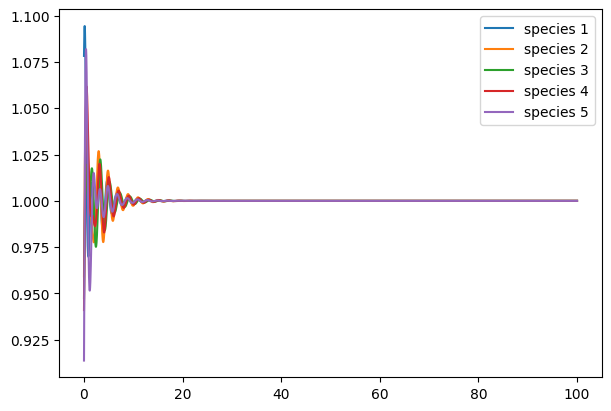

In [16]:
Timeseries = SecOrderTimeseries.main(seed=2, noise=0, s1=1, s2=1, selfint="Keystone", g_m=1, g_s=0.01, pertubation=0.1, period_pertu = 101)

The theta for this time series is:
Now we need a way to know how good the guess was. For this use the parameter error. And relatif parameter error shown by 

In [17]:
TStheta = getTheta_secondOrder(Timeseries)
LStheta = SolutionFYD(F=getF(Timeseries['timeseries']), Y=getY_secondOrder(Timeseries['timeseries']), D=getD_secondOrder(0,0,0,5))

In [18]:
def MError(M1,M2):
    return np.abs(M1-M2)
def MRelError(M,Mref):
    return np.abs(M-Mref)/abs(Mref)

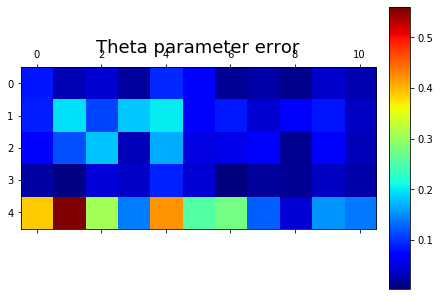

/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


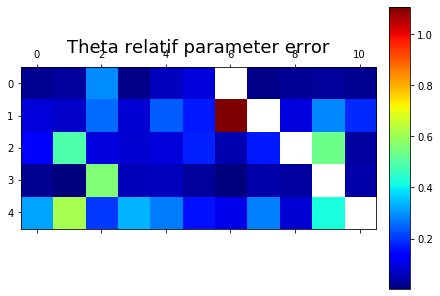

In [19]:
plotM(MError(LStheta,TStheta),"Theta parameter error")
plotM(MRelError(LStheta,TStheta),"Theta relatif parameter error")

It always seems to wrongly guess on 1 species...

Taking a look at the 

Let's have a look at the matrixes them self:

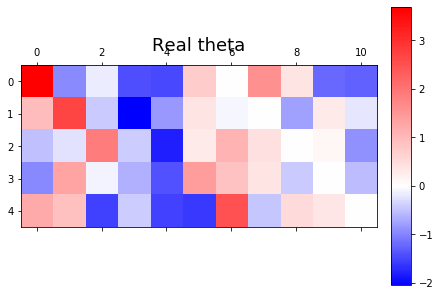

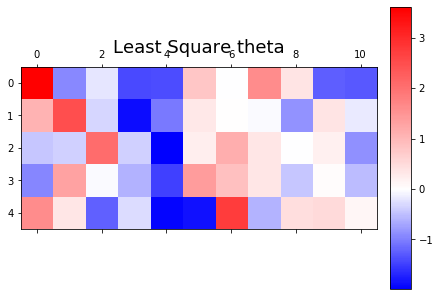

In [20]:
plotM(TStheta,"Real theta",mode="PosNeg")
plotM(LStheta,"Least Square theta",mode="PosNeg")

So it seems that the least square does seem to get the form right, and is not as bad as I thought.
Conclusion the least square does get the form of the interaction matrix right. However the error can fluctiate largely. However it is possible to find in some configuration a good fit. 

**Conclusion**:
* High absolute error corresponds often corresponds to parameters with high absolute values
* High relatif error corresponds often with parameter that have a lwo absolute value
* The LS does seem to get the topology of the parameters right (Sign is always correct, magnitude also always) it might be off a little
* The result of the fit **STRONGLY** depends on quality of the time series. This is further supported with that the fit is sometimes really bad for 1 species, so that species had a poor timeseries. Eventhough this should **NOT** be the case since there is litterly no error and should actually fit perfectly. 

*Explenation on why the fit can be bad, eventhough there is no ERROR*

My theory is, in order to infer the parameters well. The time series needs to be presented such that each parameter gets the chance to shows off its effect. For this the timeseries needs to be diverse enough. 


This indeed might be a problem with no noise simulations because maybe our trajectory in the phase space is only where some parameters don't can even exert there effects on the trajectory (or is neglible), then the error of inference of the parameter that never had effect on the trajectory is huge and you get guesses that are more wrong. 


This actually the problem with no noise simulations, because they immediatly go the equilibrium. And when going to the equilibrium effects start to die off.<br /> 
First the second order effects do not matter that much anymore, when comming close to the equilbrium. HOWEVER, We do have to infer 25 parameters of the second order effect. If the trajectory goes to quickly to the equilibrium it had not enough information to disentangle the effects of the second order effects and to try to assign information to what belongs where and how much.


Once the trajectory is in the inner region of the equilibrium, second order effects fall away, and there effect is neglible. In theory we cannot extract any information anymore about the 25 second order parameters. And in no noise simulation this happens quick. 


In theory one needs to have atleast 25 distinct observations far from equilibrium. To 100% reliably reconstruct the 25 parameters with there value. Actually because there also these effects from the 30 other parameters, one ideally needs to have more distinct parameters in the far away region, inorder to also disentangle the effect of the first order that also contribute the. 


But this is the key, 25 *distinct* observations. Because the difference between the state t and t+dt is NOT much. State t+dt does not bring that much more information to the table compared to state t. 

And so we actually need for more then 25 observation in the far away region. To extract information about the parameters, because maybe in just 25 subsequent measumerent maybe more then half the parameters saw no change in effect on the trajectory. **Important** they *do* have influance on the trajectory in far away regions, just that for those 25 subsequent measurments, the effect basicly did not change (since we stayed almost in the same region of the parameter space). And when effects do not change, we cannot acquire information about those parameters.

So we need much more then 25 observation in the far away region. But for the cases when g_m=1, we are already close to the inner region in 4 seconds giving only 400 observations... This is just not enough. While when we let g_m=0.2 the fits are for more better. just because we have more points to work with. 


*And that is why the LS fit eventhough in no-noise conditions is bad*


**Solution**
Interestingly, the solution to this problem is also our greatest enemy: noise. Noise is responsible for letting our trajectory go to regions of the phase plane, where we normally should not have come, and also makes subsequent measurments much more intersting. So on one hand we should normally require less points, but on the other hand we require MUCH more because it is noise, and one needs to have a lot of points, to infer the parameters out the noise. 

**Wait** It is possible for a good fit! I found with: (seed=2, noise=0, s1=1, s2=1, selfint="Keystone", g_m=0.2, g_s=0.01, pertubation=0.1)

now we have a maximum relatif error of 0.2 and this is for a parameter with an extreme small value. 


Next I want to see how much the system changes depending on how far we are from the equilibrium. 

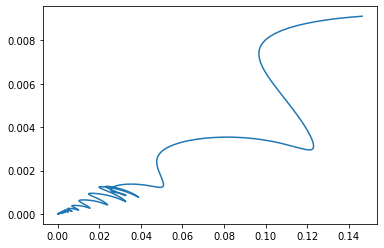

In [16]:
# First do it just for this one timeseries:
ts = Timeseries['timeseries'].values[:,1:].T 
ts_norm = ts-Timeseries['steadystate']
magnitude = np.linalg.norm(ts_norm,axis=0)[:-1]# Remove last to let the dimension (kloppen)
ModelMagnitude = np.linalg.norm(Timeseries['model'],axis=0)

#plot
plt.plot(magnitude,ModelMagnitude)
def magvsmodmag(itter=20, s1=1,s2=1,selfint="Keystone",g_m=0.2,pertu=0.1):
    fig = plt.figure(constrained_layout=True,dpi=100)
    ax = fig.add_subplot(111)
    for i in range(20):
        try:
            TS = SecOrderTimeseries.main(seed=None, noise=0, s1=s1, s2=s2, selfint=selfint, g_m=g_m, g_s=0.01, pertubation=pertu,plot=False)
        except:# skip loop if it results problems
            #print("I was at try")
            continue
        TS_norm = TS['timeseries'].values[:,1:].T -TS['steadystate']
        mag = np.linalg.norm(TS_norm,axis=0)[:-1]
        #print(np.max(mag))
        if np.max(mag)>5 or np.isnan(np.max(mag)): # skip overflows or plots that spiral out of control
            #print("I was at np.max(mag)>1")
            continue
        modmag = np.linalg.norm(TS['model'],axis=0)
        plt.plot(mag,modmag)
    return fig

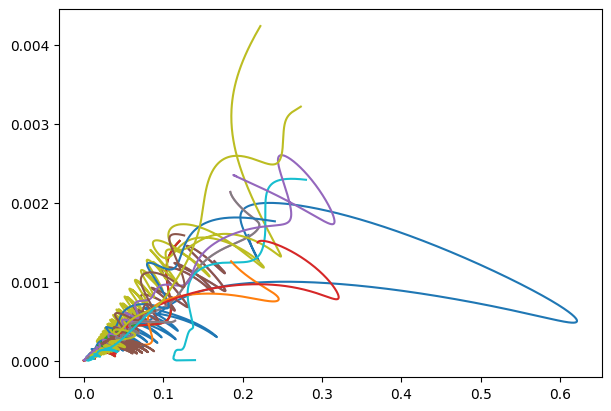

In [17]:
fig = magvsmodmag()

/home/lennart/Dropbox/VUB/2Ma Physics and Astronomy/MasterThesis/GitCode/Week5/SecOrderTimeseries.py:135: RuntimeWarning: overflow encountered in multiply
  dx = ( x *( r *( a + B.dot(x) + C.dot(x*x))- d) ) * dt # Euler method
/home/lennart/.local/lib/python3.6/site-packages/numpy/linalg/linalg.py:2512: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real


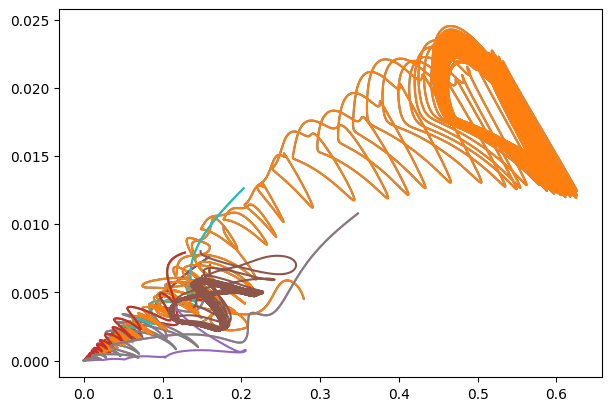

In [100]:
fig2 = magvsmodmag(itter=100,g_m=1)

we did g_m times 5 -> the slope also got times 5.

At g_m=0.2 we had a slope of +- 1/100
At g_m=1 we had a slope of +- 1/20

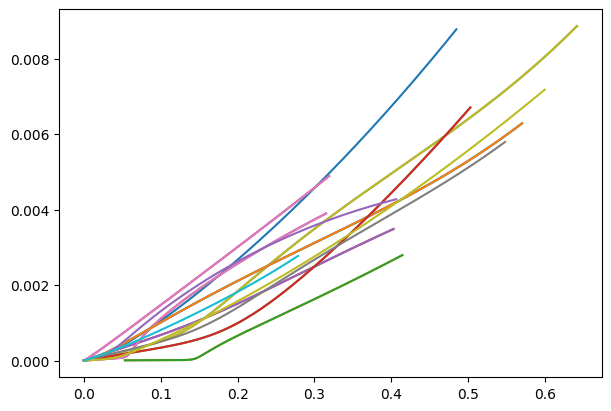

In [103]:
fig3 = magvsmodmag(itter=100,g_m=1,s1=0.05,s2=0.05,pertu=0.2)

lowing the s1, the slope got worse again. we are now at a slope of +- 1/75 (0.15/0.002)

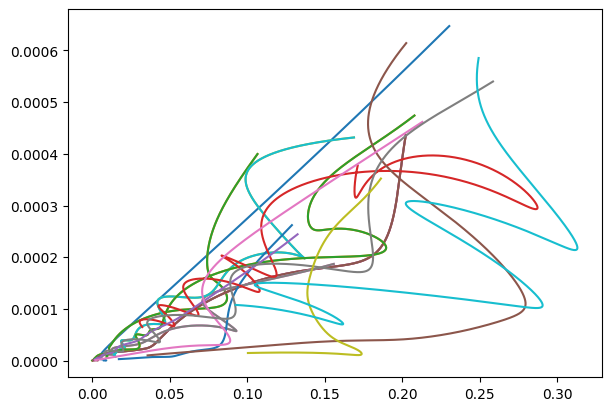

In [105]:
fig4 = magvsmodmag(itter=200,g_m=1,s1=0.05,s2=0.05, selfint=0.1,pertu=0.1)

Now we are at a slope of 1/500. So also nog good.

Let's go back to the case with high g_m and high interaction. and let's try to improve the 1/20. Before we saw if we increased the g_m by five, the slope also increased by five. so g_m should produce a slope of 1/10

/home/lennart/Dropbox/VUB/2Ma Physics and Astronomy/MasterThesis/GitCode/Week5/SecOrderTimeseries.py:135: RuntimeWarning: overflow encountered in multiply
  dx = ( x *( r *( a + B.dot(x) + C.dot(x*x))- d) ) * dt # Euler method
/home/lennart/.local/lib/python3.6/site-packages/numpy/linalg/linalg.py:2512: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real
/home/lennart/Dropbox/VUB/2Ma Physics and Astronomy/MasterThesis/GitCode/Week5/SecOrderTimeseries.py:136: RuntimeWarning: invalid value encountered in multiply
  dn = noise * x * np.sqrt(dt) * np.random.normal(0, 1, x.shape) # actually the sqrt of the time results in a larger noise effect !!! per time step. then if we let it be linear.


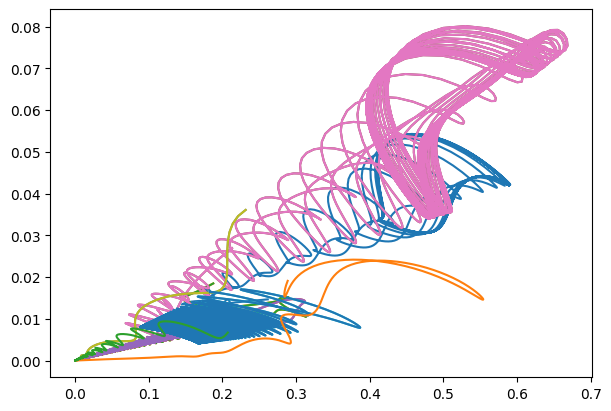

In [106]:
fig5 = magvsmodmag(itter=100,g_m=2)

Indeed as predicted, But the problem here is that it goes way to quick to zero. Only of a few cases. did it oscilate. So inthese extreme example. we could not see any effects of the higher order matrixes. 

## Little play with the noise

It took 13 attempts to find a stable state


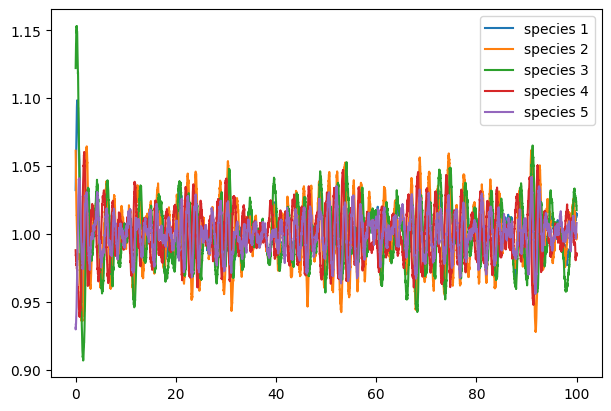

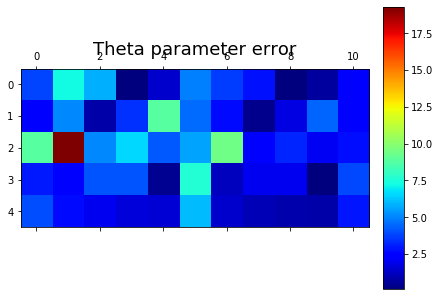

/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


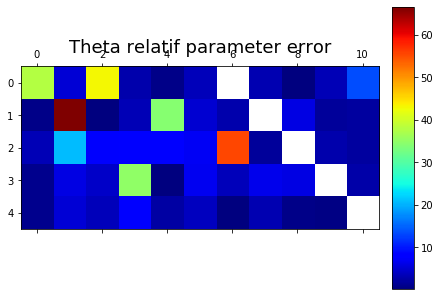

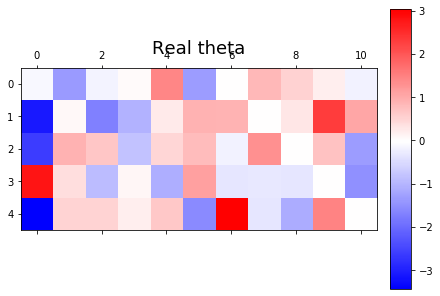

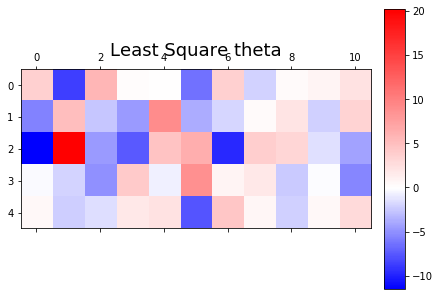

In [18]:
# let's add some noise and see how the inference goes.
# Let's try it with an 1/20 slope config, with noise 0.01
# For this configuration, the no noise was a bad inference, but this was because it quickly got to the steadystate
# Maybe with noise this is different.
Timeseries = SecOrderTimeseries.main(seed=4, noise=0.01, s1=1, s2=1, selfint="Keystone", g_m=1, g_s=0.01, pertubation=0.1)
TStheta = getTheta_secondOrder(Timeseries)
LStheta = SolutionFYD(F=getF(Timeseries['timeseries']), Y=getY_secondOrder(Timeseries['timeseries']), D=getD_secondOrder(0,0,0,5))
plotM(MError(LStheta,TStheta),"Theta parameter error")
plotM(MRelError(LStheta,TStheta),"Theta relatif parameter error")
plotM(TStheta,"Real theta",mode="PosNeg")
plotM(LStheta,"Least Square theta",mode="PosNeg")

The result is bad, Magnitdue is off, but also the sign for the most part is also not correct... 

We can also now again evaluate the model vs magnitude, wich should be nicer because noise throws it around much more, and give us a much better idea of what to expect.

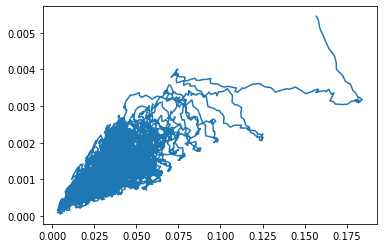

In [19]:
ts = Timeseries['timeseries'].values[:,1:].T 
ts_norm = ts-Timeseries['steadystate']
magnitude = np.linalg.norm(ts_norm,axis=0)[:-1]# Remove last to let the dimension (kloppen)
ModelMagnitude = np.linalg.norm(Timeseries['model'],axis=0)

#plot
plt.plot(magnitude,ModelMagnitude)

On average the slope seems to be 0.025vs0.001-> 1/25 so actually the slope improved! So this is the same result as before! Let's try the same configuration but with a different seed. 

It took 7 attempts to find a stable state


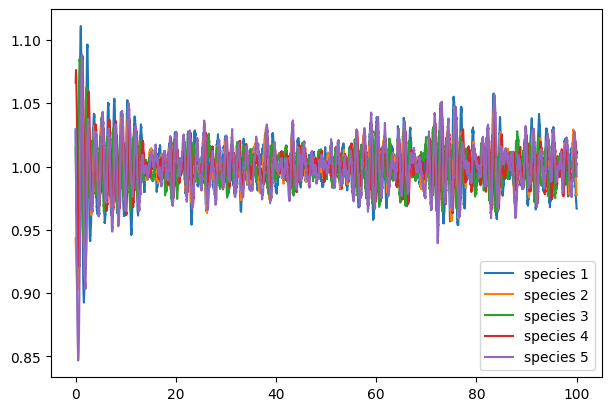

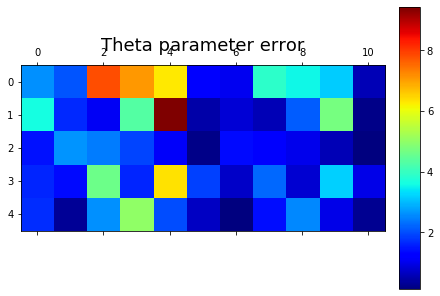

/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


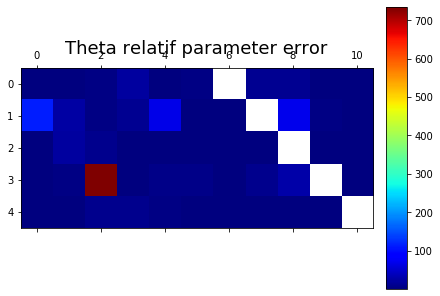

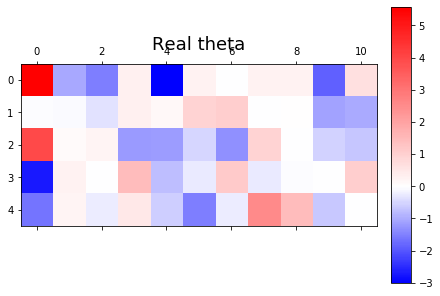

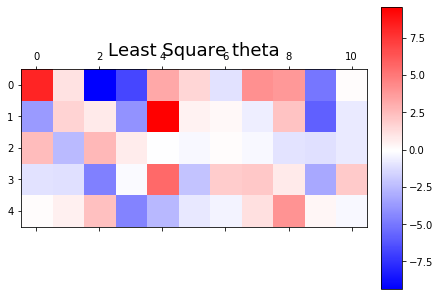

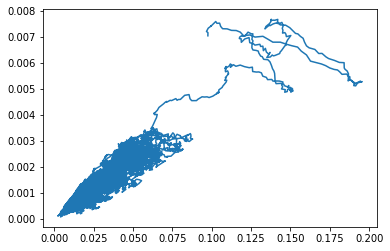

In [20]:
Timeseries = SecOrderTimeseries.main(seed=3, noise=0.01, s1=1, s2=1, selfint="Keystone", g_m=1, g_s=0.01, pertubation=0.1)
TStheta = getTheta_secondOrder(Timeseries)
LStheta = SolutionFYD(F=getF(Timeseries['timeseries']), Y=getY_secondOrder(Timeseries['timeseries']), D=getD_secondOrder(0,0,0,5))
plotM(MError(LStheta,TStheta),"Theta parameter error")
plotM(MRelError(LStheta,TStheta),"Theta relatif parameter error")
plotM(TStheta,"Real theta",mode="PosNeg")
plotM(LStheta,"Least Square theta",mode="PosNeg")
ts = Timeseries['timeseries'].values[:,1:].T 
ts_norm = ts-Timeseries['steadystate']
magnitude = np.linalg.norm(ts_norm,axis=0)[:-1]# Remove last to let the dimension (kloppen)
ModelMagnitude = np.linalg.norm(Timeseries['model'],axis=0)

#plot
plt.plot(magnitude,ModelMagnitude)

In same result and same level of slope. In either case the parameter error is still high. 

It took 3 attempts to find a stable state


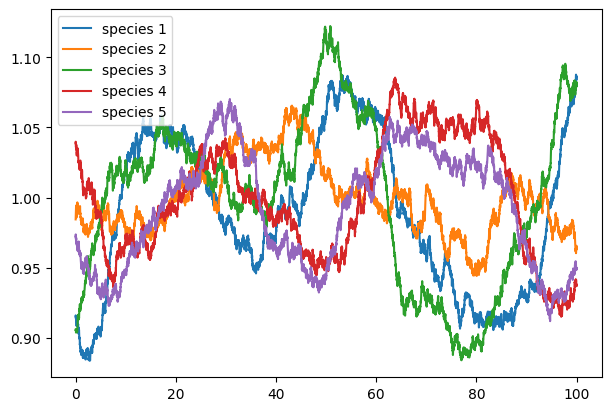

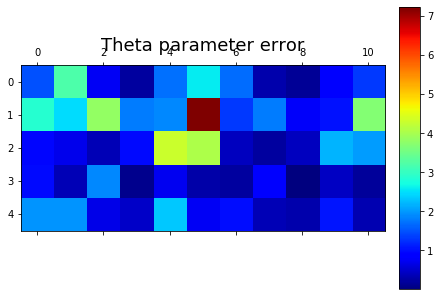

/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


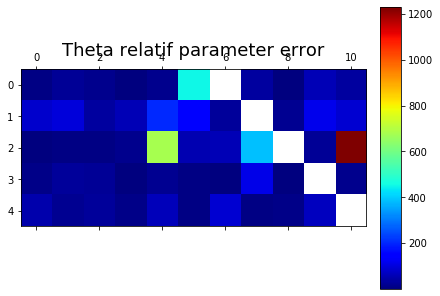

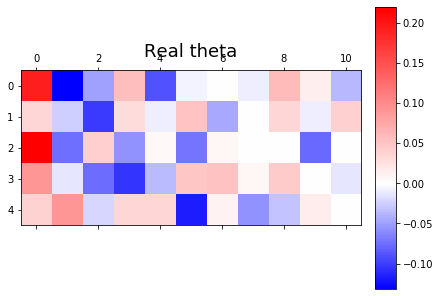

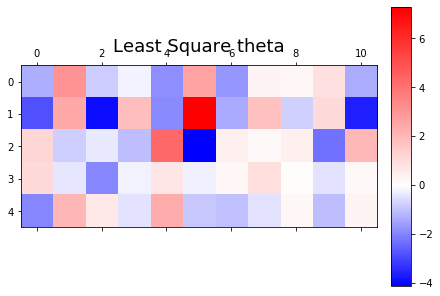

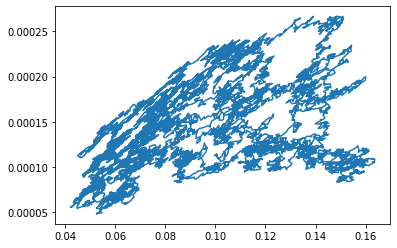

In [21]:
Timeseries = SecOrderTimeseries.main(seed=2, noise=0.01, s1=0.05, s2=0.05, selfint=0.1, g_m=1, g_s=0.01, pertubation=0.1)
TStheta = getTheta_secondOrder(Timeseries)
LStheta = SolutionFYD(F=getF(Timeseries['timeseries']), Y=getY_secondOrder(Timeseries['timeseries']), D=getD_secondOrder(0,0,0,5))
plotM(MError(LStheta,TStheta),"Theta parameter error")
plotM(MRelError(LStheta,TStheta),"Theta relatif parameter error")
plotM(TStheta,"Real theta",mode="PosNeg")
plotM(LStheta,"Least Square theta",mode="PosNeg")
ts = Timeseries['timeseries'].values[:,1:].T 
ts_norm = ts-Timeseries['steadystate']
magnitude = np.linalg.norm(ts_norm,axis=0)[:-1]# Remove last to let the dimension (kloppen)
ModelMagnitude = np.linalg.norm(Timeseries['model'],axis=0)

#plot
plt.plot(magnitude,ModelMagnitude)

Cases where it seemed to have gone okish, at least the inference got the gist right:
* Timeseries = SecOrderTimeseries.main(seed=3, noise=0.05, s1=1, s2=1, selfint="Keystone", g_m=0.2, g_s=0.01, pertubation=0.1)

Not a good inference, but here you the difference between:
SecOrderTimeseries.main(seed=2, noise=0.01, s1=0.05, s2=0.05, selfint=None, g_m=1, g_s=0.01, pertubation=0.1)
and
SecOrderTimeseries.main(seed=2, noise=0.05, s1=0.05, s2=0.05, selfint=None, g_m=1, g_s=0.01, pertubation=0.1)
easily shows that it does not improve the signal to noise ratio, just that the cone is now smaller. 

It took 7 attempts to find a stable state


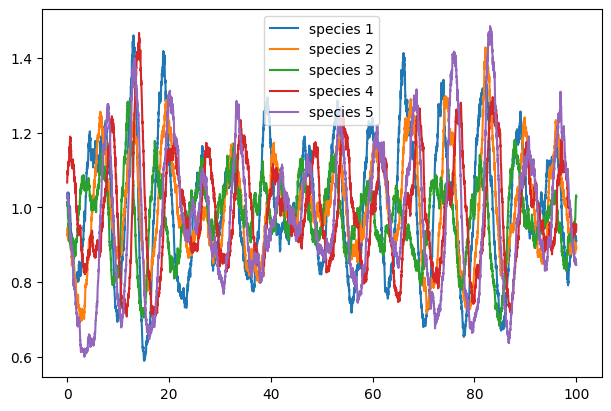

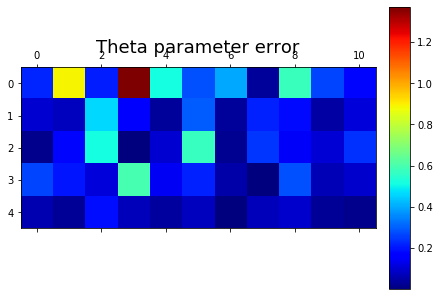

/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


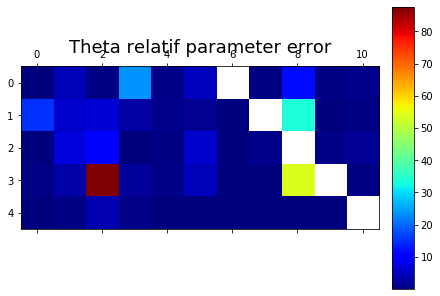

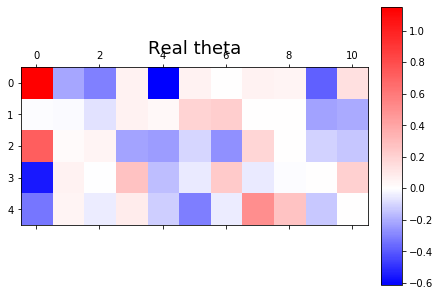

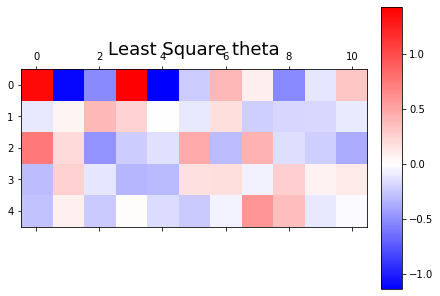

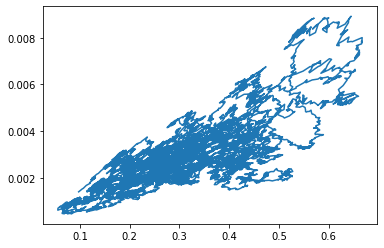

In [23]:
# the only good inference one:
Timeseries = Timeseries = SecOrderTimeseries.main(seed=3, noise=0.05, s1=1, s2=1, selfint="Keystone", g_m=0.2, g_s=0.01, pertubation=0.1)
TStheta = getTheta_secondOrder(Timeseries)
LStheta = SolutionFYD(F=getF(Timeseries['timeseries']), Y=getY_secondOrder(Timeseries['timeseries']), D=getD_secondOrder(0,0,0,5))
plotM(MError(LStheta,TStheta),"Theta parameter error")
plotM(MRelError(LStheta,TStheta),"Theta relatif parameter error")
plotM(TStheta,"Real theta",mode="PosNeg")
plotM(LStheta,"Least Square theta",mode="PosNeg")
ts = Timeseries['timeseries'].values[:,1:].T 
ts_norm = ts-Timeseries['steadystate']
magnitude = np.linalg.norm(ts_norm,axis=0)[:-1]# Remove last to let the dimension (kloppen)
ModelMagnitude = np.linalg.norm(Timeseries['model'],axis=0)

#plot
plt.plot(magnitude,ModelMagnitude)

For the rest it always seems to get it wrong... 

----------------------------------------------

Inference (no noise) with pertubation. 


It took 10 attempts to find a stable state


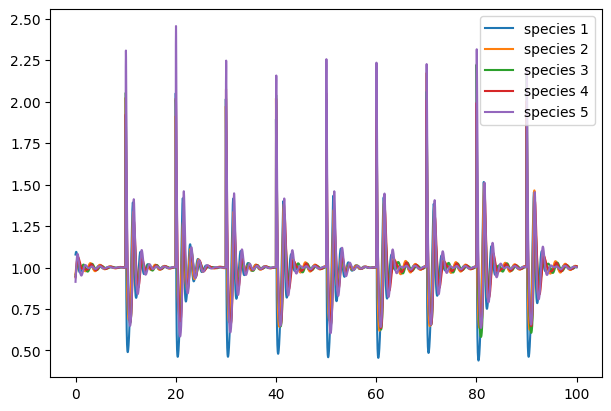

In [26]:
Timeseries = SecOrderTimeseries.main(seed=2, noise=0, s1=1, s2=1, selfint="Keystone", g_m=1, g_s=0.01, pertubation=0.1, period_pertu = 10)
TStheta = getTheta_secondOrder(Timeseries)

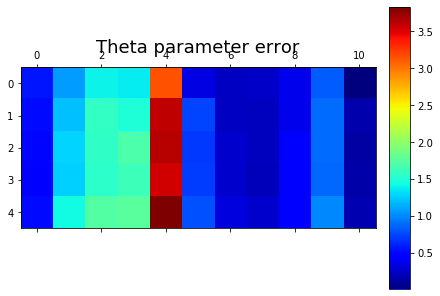

/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


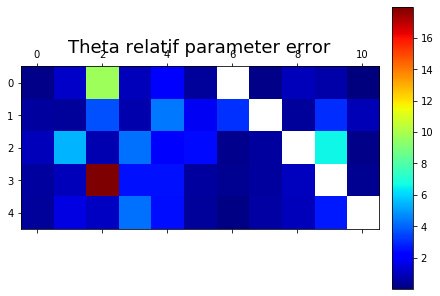

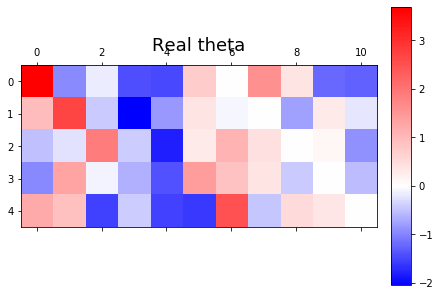

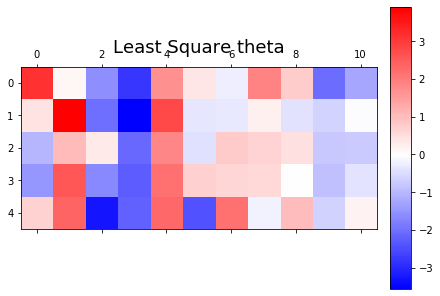

In [27]:
TStheta = getTheta_secondOrder(Timeseries)
LStheta = SolutionFYD(F=getF(Timeseries['timeseries']), Y=getY_secondOrder(Timeseries['timeseries']), D=getD_secondOrder(0,0,0,5))
plotM(MError(LStheta,TStheta),"Theta parameter error")
plotM(MRelError(LStheta,TStheta),"Theta relatif parameter error")
plotM(TStheta,"Real theta",mode="PosNeg")
plotM(LStheta,"Least Square theta",mode="PosNeg")